# Using kmeans for colour compression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from PIL import Image

plt.style.use('seaborn')

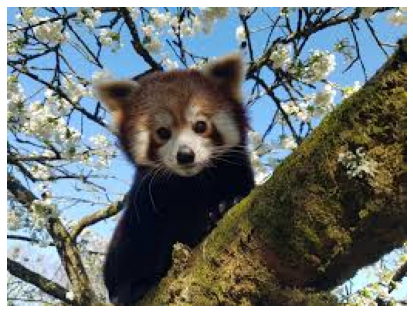

In [2]:
#importing the data
image = Image.open('panda.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image)

In [3]:
#obtaining the RGB array
arr_image = np.array(image)
#reshaping the data and rescaling the colours
data = arr_image/255.0 #255 possible color contributions
data = data.reshape(len(arr_image)*len(arr_image[0]), 3)

In [4]:
#reducing the possible colours to 5 via kmeans clustering
#using mini batch due to the size of the dataset
model = MiniBatchKMeans(n_clusters=5)
model.fit(data)
new_colours = model.cluster_centers_[model.predict(data)]

Text(0.5, 1.0, 'Transformed')

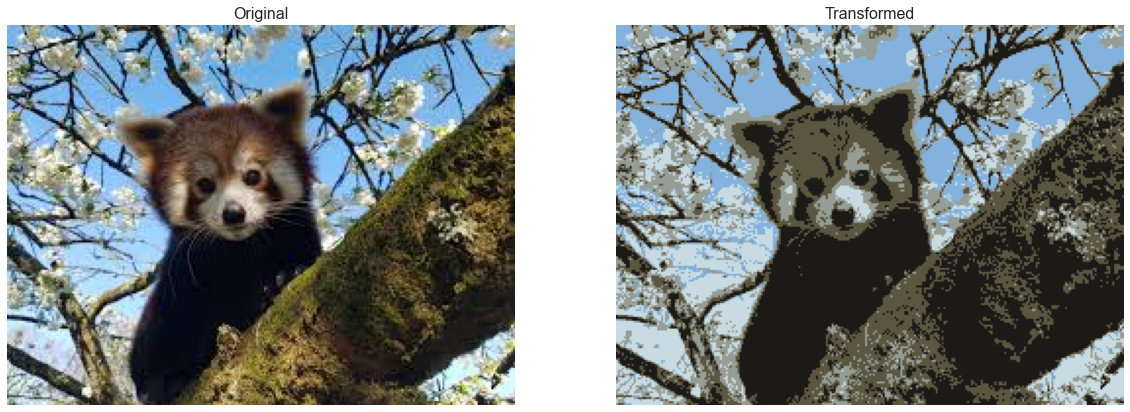

In [5]:
#now plotting the image with the new colours
image_transformed = new_colours.reshape(arr_image.shape)

fig, ax = plt.subplots(1,2, subplot_kw=dict(xticks=[], yticks=[]), figsize=(20,10))
ax[0].imshow(image)
ax[0].set_title('Original', size=16)
ax[1].imshow(image_transformed)
ax[1].set_title('Transformed', size=16)